In [2]:
import skdim
import numpy as np
import time
import tensorflow as tf

### Port fashion mnist dataset with (un)known intrinsic dimension:

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0

test_images = test_images / 255.0

### Obtain a sample estimation of ID:

In [4]:
data = train_images
data = data.reshape((len(data), -1))

In [ ]:
start_time = time.time()


#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA(verbose=True).fit_pw(data,
                              n_neighbors = 100,
                              n_jobs = -1,)

print("--- %s seconds ---" % (time.time() - start_time))

#get estimated intrinsic dimension
print(np.mean(lpca.dimension_pw_))
print("lPCA (Local)")

### Investigate loss on different types of autoencoders (and mixes of IDs)

In [5]:
X_train = train_images
X_valid = test_images

Standard autoencoder, 10 epochs: val_loss of 0.0196

In [6]:
tf.keras.utils.set_random_seed(42) # extra code – ensures reproducibility on CPU

ID = 25
#ID = 1

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dense(30, activation="relu"),
    #tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(ID, activation="relu"),
])
stacked_decoder = tf.keras.Sequential([
    #tf.keras.layers.Dense(20, activation="relu"),
    #tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="mse", optimizer="nadam")                   
history = stacked_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1875/1875 [==============================] - 2s 721us/step - loss: 0.0271 - val_loss: 0.0198
Epoch 2/10
1875/1875 [==============================] - 1s 647us/step - loss: 0.0196 - val_loss: 0.0192
Epoch 3/10
1875/1875 [==============================] - 1s 635us/step - loss: 0.0191 - val_loss: 0.0187
Epoch 4/10
1875/1875 [==============================] - 1s 638us/step - loss: 0.0184 - val_loss: 0.0183
Epoch 5/10
1875/1875 [==============================] - 1s 638us/step - loss: 0.0183 - val_loss: 0.0183
Epoch 6/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.0183 - val_loss: 0.0182
Epoch 7/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.0183 - val_loss: 0.0183
Epoch 8/10
1875/1875 [==============================] - 1s 627us/step - loss: 0.0183 - val_loss: 0.0182
Epoch 9/10
1875/1875 [==============================] - 1s 627us/step - loss: 0.0183 - val_loss: 0.0182
Epoch 10/10
1875/1875 [==============================] - 1s 672u

Stacked autoencoder, 10 epochs: val_loss of 0.0119

In [17]:
tf.keras.utils.set_random_seed(42) # extra code – ensures reproducibility on CPU

ID = 25

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(380, activation="relu"),
    tf.keras.layers.Dense(190, activation="relu"),
    tf.keras.layers.Dense(ID, activation="relu"),
])
stacked_decoder = tf.keras.Sequential([
    #tf.keras.layers.Dense(ID, activation="relu"),
    tf.keras.layers.Dense(190, activation="relu"),
    tf.keras.layers.Dense(380, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="mse", optimizer="nadam")                   
history = stacked_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0213 - val_loss: 0.0162
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0152 - val_loss: 0.0146
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0139 - val_loss: 0.0134
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0132 - val_loss: 0.0129
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0127 - val_loss: 0.0129
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0122 - val_loss: 0.0123
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0120 - val_loss: 0.0119
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

1/1 [==============================] - 0s 11ms/step


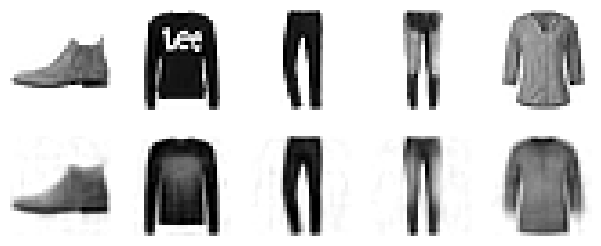

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

plot_reconstructions(stacked_ae)
plt.show()

### Classifier Comparison

Standard Tutorial Classifier: 

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start_time = time.time()

model.fit(train_images, train_labels, epochs=50)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
1875/1875 [==============================] - 2s 716us/step - loss: 0.5005 - accuracy: 0.8255
Epoch 2/50
1875/1875 [==============================] - 1s 716us/step - loss: 0.3748 - accuracy: 0.8648
Epoch 3/50
1875/1875 [==============================] - 1s 722us/step - loss: 0.3363 - accuracy: 0.8781
Epoch 4/50
1875/1875 [==============================] - 1s 713us/step - loss: 0.3130 - accuracy: 0.8854
Epoch 5/50
1875/1875 [==============================] - 1s 717us/step - loss: 0.2947 - accuracy: 0.8917
Epoch 6/50
1875/1875 [==============================] - 1s 713us/step - loss: 0.2798 - accuracy: 0.8967
Epoch 7/50
1875/1875 [==============================] - 1s 712us/step - loss: 0.2682 - accuracy: 0.9010
Epoch 8/50
1875/1875 [==============================] - 1s 712us/step - loss: 0.2552 - accuracy: 0.9057
Epoch 9/50
1875/1875 [==============================] - 1s 731us/step - loss: 0.2469 - accuracy: 0.9085
Epoch 10/50
1875/1875 [==============================] - 1s 750u

In [12]:
from sklearn.metrics import f1_score

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
f1 = f1_score(test_labels, [np.argmax(a) for a in model.predict(test_images)], average='weighted')

print('\nTest accuracy:', test_acc)
print('\nTest F1 (weighted):', f1)

313/313 - 0s - loss: 0.5270 - accuracy: 0.8883 - 192ms/epoch - 613us/step
313/313 [==============================] - 0s 432us/step

Test accuracy: 0.8883000016212463

Test F1 (weighted): 0.8881484215539828


Modified Feedforward Classifier:

In [7]:
ID = 15

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dense(380, activation="relu"),
    #tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(ID, activation="relu"),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start_time = time.time()

model.fit(train_images, train_labels, epochs=50)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
1875/1875 [==============================] - 1s 461us/step - loss: 0.5949 - accuracy: 0.7967
Epoch 2/50
1875/1875 [==============================] - 1s 455us/step - loss: 0.4400 - accuracy: 0.8469
Epoch 3/50
1875/1875 [==============================] - 1s 441us/step - loss: 0.4126 - accuracy: 0.8562
Epoch 4/50
1875/1875 [==============================] - 1s 436us/step - loss: 0.3955 - accuracy: 0.8618
Epoch 5/50
1875/1875 [==============================] - 1s 434us/step - loss: 0.3868 - accuracy: 0.8635
Epoch 6/50
1875/1875 [==============================] - 1s 446us/step - loss: 0.3767 - accuracy: 0.8671
Epoch 7/50
1875/1875 [==============================] - 1s 428us/step - loss: 0.3705 - accuracy: 0.8692
Epoch 8/50
1875/1875 [==============================] - 1s 434us/step - loss: 0.3627 - accuracy: 0.8719
Epoch 9/50
1875/1875 [==============================] - 1s 436us/step - loss: 0.3593 - accuracy: 0.8724
Epoch 10/50
1875/1875 [==============================] - 1s 436u

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
f1 = f1_score(test_labels, [np.argmax(a) for a in model.predict(test_images)], average='weighted')

print('\nTest accuracy:', test_acc)
print('\nTest F1 (weighted):', f1)

313/313 - 0s - loss: 0.4177 - accuracy: 0.8643 - 116ms/epoch - 372us/step
313/313 [==============================] - 0s 317us/step

Test accuracy: 0.864300012588501

Test F1 (weighted): 0.8635236890292687
